資料前處理

In [4]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm
from matplotlib.colors import Colormap
from wordcloud import WordCloud 
import jieba
%matplotlib inline

# plt.rcParams['font.sans-serif']=['SimHei'] #使 matplotilb 中文能正常顯示
fprop = fm.FontProperties(fname="./raw_data/SourceHanSansTW-Regular.otf")

# 設定整份 notebook 圖片的長寬與 dpi
plt.rcParams["figure.figsize"] = [6, 4]
plt.rcParams["figure.dpi"] = 150

In [5]:
df = pd.read_csv("./raw_data/expo_news.csv")
df["artDate"] = pd.to_datetime(df["artDate"])
df['artDate'] = df['artDate'].dt.date 
df.head()

,system_id,artTitle,artDate,artCatagory,artUrl,artContent,dataSource
0,1,大阪萬博周邊秒殺！ 要價400萬公仔、7年級回憶電子雞在列,2025-04-14,國際,https://tw.nextapple.com/international/2025041...,【余平／綜合外電】日本大阪萬博會今天開幕，一早就出現排隊人潮，官方商店門口在早上9點開門後馬...,appleDaily
1,2,大阪世博13日正式開幕 觀展準備一次看,2025-04-12,國際,https://news.ebc.net.tw/news/world/483626,2025年世界博覽會（大阪世博）今天舉行開幕儀式，明天開展。這是自2005年「愛．地球博」以...,EBC
2,3,日美關稅談判內幕 川普要求多進口美車 互贈中製紀念品,2025-04-20,國際,https://news.ebc.net.tw/news/world/485389,美國總統川普關稅戰，日本是首波談判國家之一，日本談判代表回國後透露了會談細節，川普親自出馬毫...,EBC
3,4,直擊大阪世博TW館！猛秀晶片實力 滷肉飯飄香,2025-04-22,國際,https://news.ebc.net.tw/news/world/486002,隨著日本大阪萬博會展開，台灣的TECHWORLD館也在22號盛大開幕了，斥資20億台幣，場館...,EBC
4,5,黃金周變「省錢周」！ 日本物價高漲掀假期「宅家」潮,2025-04-27,國際,https://news.ebc.net.tw/news/world/487042,日本迎來一年一度的黃金周，從四月底到五月初，多個連假串聯，吸引大量民眾湧入機場、樂園等景點，...,EBC


In [7]:
#資料清理
clear_df = df.copy()

#去除本次不會用到的欄位
drop_cols = ['system_id','artCatagory', 'dataSource']
clear_df.drop(drop_cols, axis = 1, inplace = True)

#去除文章內容為空值的筆數
clear_df.dropna(subset = ['artContent'], axis=0, how='any', inplace=True)

#新增['sentence']欄位，用'。'取代'\n\n'，並移除'\n'
clear_df['sentence'] = clear_df['artContent'].str.replace(r'\n\n','。', regex=True)
clear_df['sentence'] = clear_df['sentence'].str.replace(r'\n','', regex=True)

#移除內文中的網址
clear_df['sentence'] = clear_df['sentence'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

clear_df.head()

,artTitle,artDate,artUrl,artContent,sentence
0,大阪萬博周邊秒殺！ 要價400萬公仔、7年級回憶電子雞在列,2025-04-14,https://tw.nextapple.com/international/2025041...,【余平／綜合外電】日本大阪萬博會今天開幕，一早就出現排隊人潮，官方商店門口在早上9點開門後馬...,【余平／綜合外電】日本大阪萬博會今天開幕，一早就出現排隊人潮，官方商店門口在早上9點開門後馬...
1,大阪世博13日正式開幕 觀展準備一次看,2025-04-12,https://news.ebc.net.tw/news/world/483626,2025年世界博覽會（大阪世博）今天舉行開幕儀式，明天開展。這是自2005年「愛．地球博」以...,2025年世界博覽會（大阪世博）今天舉行開幕儀式，明天開展。這是自2005年「愛．地球博」以...
2,日美關稅談判內幕 川普要求多進口美車 互贈中製紀念品,2025-04-20,https://news.ebc.net.tw/news/world/485389,美國總統川普關稅戰，日本是首波談判國家之一，日本談判代表回國後透露了會談細節，川普親自出馬毫...,美國總統川普關稅戰，日本是首波談判國家之一，日本談判代表回國後透露了會談細節，川普親自出馬毫...
3,直擊大阪世博TW館！猛秀晶片實力 滷肉飯飄香,2025-04-22,https://news.ebc.net.tw/news/world/486002,隨著日本大阪萬博會展開，台灣的TECHWORLD館也在22號盛大開幕了，斥資20億台幣，場館...,隨著日本大阪萬博會展開，台灣的TECHWORLD館也在22號盛大開幕了，斥資20億台幣，場館...
4,黃金周變「省錢周」！ 日本物價高漲掀假期「宅家」潮,2025-04-27,https://news.ebc.net.tw/news/world/487042,日本迎來一年一度的黃金周，從四月底到五月初，多個連假串聯，吸引大量民眾湧入機場、樂園等景點，...,日本迎來一年一度的黃金周，從四月底到五月初，多個連假串聯，吸引大量民眾湧入機場、樂園等景點，...


In [8]:
#斷句
clear_df['sentence'] = clear_df['sentence'].str.split("[,，。！!？?]{1,}")

sent_df = clear_df.explode('sentence').reset_index(drop=True)

sent_df.head()

,artTitle,artDate,artUrl,artContent,sentence
0,大阪萬博周邊秒殺！ 要價400萬公仔、7年級回憶電子雞在列,2025-04-14,https://tw.nextapple.com/international/2025041...,【余平／綜合外電】日本大阪萬博會今天開幕，一早就出現排隊人潮，官方商店門口在早上9點開門後馬...,【余平／綜合外電】日本大阪萬博會今天開幕
1,大阪萬博周邊秒殺！ 要價400萬公仔、7年級回憶電子雞在列,2025-04-14,https://tw.nextapple.com/international/2025041...,【余平／綜合外電】日本大阪萬博會今天開幕，一早就出現排隊人潮，官方商店門口在早上9點開門後馬...,一早就出現排隊人潮
2,大阪萬博周邊秒殺！ 要價400萬公仔、7年級回憶電子雞在列,2025-04-14,https://tw.nextapple.com/international/2025041...,【余平／綜合外電】日本大阪萬博會今天開幕，一早就出現排隊人潮，官方商店門口在早上9點開門後馬...,官方商店門口在早上9點開門後馬上大排長龍
3,大阪萬博周邊秒殺！ 要價400萬公仔、7年級回憶電子雞在列,2025-04-14,https://tw.nextapple.com/international/2025041...,【余平／綜合外電】日本大阪萬博會今天開幕，一早就出現排隊人潮，官方商店門口在早上9點開門後馬...,有些商品甚至已經在首日就售罄
4,大阪萬博周邊秒殺！ 要價400萬公仔、7年級回憶電子雞在列,2025-04-14,https://tw.nextapple.com/international/2025041...,【余平／綜合外電】日本大阪萬博會今天開幕，一早就出現排隊人潮，官方商店門口在早上9點開門後馬...,Ytv新聞報導


In [9]:
#匯入斷詞字典
jieba.set_dictionary('dict/dict.txt')
jieba.load_userdict('dict/expo_dict.txt')

Building prefix dict from c:\Users\User\OneDrive\桌面\社群媒體分析\SMA_2025S\社媒期末專案\dict\dict.txt ...
Dumping model to file cache C:\Users\User\AppData\Local\Temp\jieba.u75f7e282025976d857073c78ba4d330e.cache
Loading model cost 0.878 seconds.
Prefix dict has been built successfully.


In [10]:
#去除句子中除了字母、數字、空白字符以外的符號
sent_df['sentence'] = sent_df['sentence'].str.replace(r'[^\w\s]+', '', regex=True).astype(str)

# 把長度小於1的sentence刪掉
sent_df = sent_df[sent_df["sentence"].str.len() > 1]

sent_df.head()

,artTitle,artDate,artUrl,artContent,sentence
0,大阪萬博周邊秒殺！ 要價400萬公仔、7年級回憶電子雞在列,2025-04-14,https://tw.nextapple.com/international/2025041...,【余平／綜合外電】日本大阪萬博會今天開幕，一早就出現排隊人潮，官方商店門口在早上9點開門後馬...,余平綜合外電日本大阪萬博會今天開幕
1,大阪萬博周邊秒殺！ 要價400萬公仔、7年級回憶電子雞在列,2025-04-14,https://tw.nextapple.com/international/2025041...,【余平／綜合外電】日本大阪萬博會今天開幕，一早就出現排隊人潮，官方商店門口在早上9點開門後馬...,一早就出現排隊人潮
2,大阪萬博周邊秒殺！ 要價400萬公仔、7年級回憶電子雞在列,2025-04-14,https://tw.nextapple.com/international/2025041...,【余平／綜合外電】日本大阪萬博會今天開幕，一早就出現排隊人潮，官方商店門口在早上9點開門後馬...,官方商店門口在早上9點開門後馬上大排長龍
3,大阪萬博周邊秒殺！ 要價400萬公仔、7年級回憶電子雞在列,2025-04-14,https://tw.nextapple.com/international/2025041...,【余平／綜合外電】日本大阪萬博會今天開幕，一早就出現排隊人潮，官方商店門口在早上9點開門後馬...,有些商品甚至已經在首日就售罄
4,大阪萬博周邊秒殺！ 要價400萬公仔、7年級回憶電子雞在列,2025-04-14,https://tw.nextapple.com/international/2025041...,【余平／綜合外電】日本大阪萬博會今天開幕，一早就出現排隊人潮，官方商店門口在早上9點開門後馬...,Ytv新聞報導


In [11]:
#文章斷詞
word_df = sent_df.assign(word = sent_df['sentence'].apply(jieba.lcut)).explode('word').drop(['sentence'], axis=1)

#去除少於兩個字的詞語
word_df = word_df.loc[word_df['word'].str.len() > 1]

word_df.head()

,artTitle,artDate,artUrl,artContent,word
0,大阪萬博周邊秒殺！ 要價400萬公仔、7年級回憶電子雞在列,2025-04-14,https://tw.nextapple.com/international/2025041...,【余平／綜合外電】日本大阪萬博會今天開幕，一早就出現排隊人潮，官方商店門口在早上9點開門後馬...,余平
0,大阪萬博周邊秒殺！ 要價400萬公仔、7年級回憶電子雞在列,2025-04-14,https://tw.nextapple.com/international/2025041...,【余平／綜合外電】日本大阪萬博會今天開幕，一早就出現排隊人潮，官方商店門口在早上9點開門後馬...,綜合
0,大阪萬博周邊秒殺！ 要價400萬公仔、7年級回憶電子雞在列,2025-04-14,https://tw.nextapple.com/international/2025041...,【余平／綜合外電】日本大阪萬博會今天開幕，一早就出現排隊人潮，官方商店門口在早上9點開門後馬...,外電
0,大阪萬博周邊秒殺！ 要價400萬公仔、7年級回憶電子雞在列,2025-04-14,https://tw.nextapple.com/international/2025041...,【余平／綜合外電】日本大阪萬博會今天開幕，一早就出現排隊人潮，官方商店門口在早上9點開門後馬...,日本
0,大阪萬博周邊秒殺！ 要價400萬公仔、7年級回憶電子雞在列,2025-04-14,https://tw.nextapple.com/international/2025041...,【余平／綜合外電】日本大阪萬博會今天開幕，一早就出現排隊人潮，官方商店門口在早上9點開門後馬...,大阪萬博


In [12]:
stopwords = [line.strip() for line in open('dict/stopwords.txt', 'r', encoding='utf-8').readlines()]
noStop_df = word_df[~word_df['word'].isin(stopwords)]
noStop_df.head()

,artTitle,artDate,artUrl,artContent,word
0,大阪萬博周邊秒殺！ 要價400萬公仔、7年級回憶電子雞在列,2025-04-14,https://tw.nextapple.com/international/2025041...,【余平／綜合外電】日本大阪萬博會今天開幕，一早就出現排隊人潮，官方商店門口在早上9點開門後馬...,余平
0,大阪萬博周邊秒殺！ 要價400萬公仔、7年級回憶電子雞在列,2025-04-14,https://tw.nextapple.com/international/2025041...,【余平／綜合外電】日本大阪萬博會今天開幕，一早就出現排隊人潮，官方商店門口在早上9點開門後馬...,綜合
0,大阪萬博周邊秒殺！ 要價400萬公仔、7年級回憶電子雞在列,2025-04-14,https://tw.nextapple.com/international/2025041...,【余平／綜合外電】日本大阪萬博會今天開幕，一早就出現排隊人潮，官方商店門口在早上9點開門後馬...,外電
0,大阪萬博周邊秒殺！ 要價400萬公仔、7年級回憶電子雞在列,2025-04-14,https://tw.nextapple.com/international/2025041...,【余平／綜合外電】日本大阪萬博會今天開幕，一早就出現排隊人潮，官方商店門口在早上9點開門後馬...,日本
0,大阪萬博周邊秒殺！ 要價400萬公仔、7年級回憶電子雞在列,2025-04-14,https://tw.nextapple.com/international/2025041...,【余平／綜合外電】日本大阪萬博會今天開幕，一早就出現排隊人潮，官方商店門口在早上9點開門後馬...,大阪萬博


進行情緒分析

In [13]:
# 讀取情緒字典
liwc_dict = pd.read_csv("./dict/liwc/LIWC_CH.csv")
liwc_dict = liwc_dict.rename(columns={'name': 'word', "class": 'sentiments'})
liwc_dict.head()

,word,sentiments
0,):,affect
1,3q,affect
2,:(,affect
3,:),affect
4,<3,affect


In [14]:
ptt_liwc_df = pd.merge(noStop_df[["artUrl", "artDate", "artTitle", "artContent", "word"]], liwc_dict, how="left")
ptt_liwc_df.head()

,artUrl,artDate,artTitle,artContent,word,sentiments
0,https://tw.nextapple.com/international/2025041...,2025-04-14,大阪萬博周邊秒殺！ 要價400萬公仔、7年級回憶電子雞在列,【余平／綜合外電】日本大阪萬博會今天開幕，一早就出現排隊人潮，官方商店門口在早上9點開門後馬...,余平,NaN
1,https://tw.nextapple.com/international/2025041...,2025-04-14,大阪萬博周邊秒殺！ 要價400萬公仔、7年級回憶電子雞在列,【余平／綜合外電】日本大阪萬博會今天開幕，一早就出現排隊人潮，官方商店門口在早上9點開門後馬...,綜合,NaN
2,https://tw.nextapple.com/international/2025041...,2025-04-14,大阪萬博周邊秒殺！ 要價400萬公仔、7年級回憶電子雞在列,【余平／綜合外電】日本大阪萬博會今天開幕，一早就出現排隊人潮，官方商店門口在早上9點開門後馬...,外電,NaN
3,https://tw.nextapple.com/international/2025041...,2025-04-14,大阪萬博周邊秒殺！ 要價400萬公仔、7年級回憶電子雞在列,【余平／綜合外電】日本大阪萬博會今天開幕，一早就出現排隊人潮，官方商店門口在早上9點開門後馬...,日本,NaN
4,https://tw.nextapple.com/international/2025041...,2025-04-14,大阪萬博周邊秒殺！ 要價400萬公仔、7年級回憶電子雞在列,【余平／綜合外電】日本大阪萬博會今天開幕，一早就出現排隊人潮，官方商店門口在早上9點開門後馬...,大阪萬博,NaN


In [15]:
sentiment_count = pd.DataFrame(
    ptt_liwc_df.groupby(["artDate", "sentiments"]).size()
).reset_index()

mask = (sentiment_count['sentiments'] == "positive") | (sentiment_count['sentiments'] == "negative") 
sentiment_count = sentiment_count.loc[mask]

sentiment_count = sentiment_count.rename(columns={0: "size"})
sentiment_count = sentiment_count.sort_values(["artDate"])
sentiment_count.head(10)

,artDate,sentiments,size
2,2025-01-03,negative,2
3,2025-01-03,positive,3
6,2025-01-19,negative,1
7,2025-01-19,positive,3
11,2025-03-14,negative,3
12,2025-03-14,positive,4
16,2025-04-06,negative,3
17,2025-04-06,positive,5
21,2025-04-07,negative,11
22,2025-04-07,positive,5


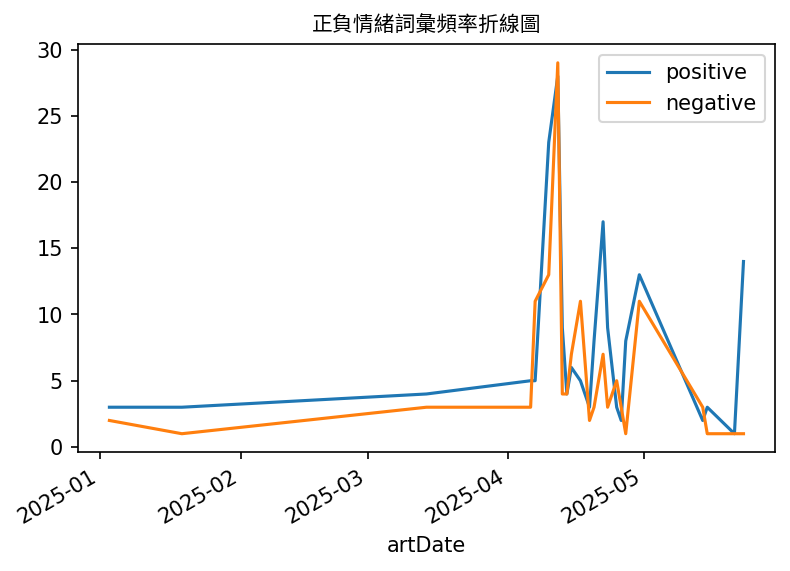

In [16]:
colors = ["tab:blue", "tab:orange"]
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]

# fig, ax = plt.subplots(figsize = (6,4), dpi = 150) # 也可以在該圖設定參數
fig, ax = plt.subplots()

ax.plot(pos["artDate"], pos["size"], color=colors[0])
ax.plot(neg["artDate"], neg["size"], color=colors[1])

plt.xlabel("artDate")
# plt.ylabel('size')
ax.legend(["positive", "negative"], loc="upper right")
fig.autofmt_xdate()
plt.title("正負情緒詞彙頻率折線圖", fontproperties=fprop)  # 記得加上才能顯示中文
plt.show()

因為萬博的開幕日為2025/04/13，所以可以發現4月後的討論度明顯變高。以及在開幕日前，以及有些對大阪萬博的負評，但是實際跑完分析後，會發現其實正向評論和負向評論是差不多的，所以大家腦中常常出現的萬博負面評論，有可能是被媒體刻意放大報導，或是社群平台發送的資訊偏頗。

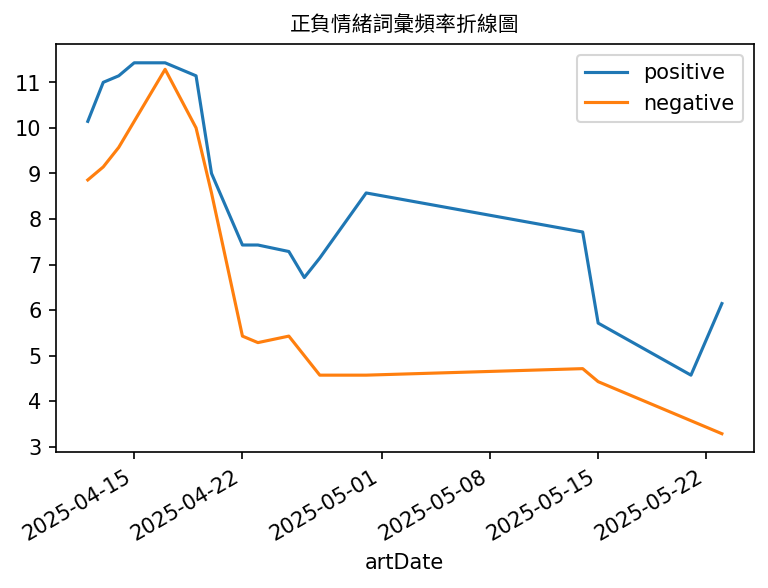

In [17]:
colors = ["tab:blue", "tab:orange"]
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]

# fig, ax = plt.subplots(figsize = (6,4), dpi = 150) # 也可以在該圖設定參數
fig, ax = plt.subplots()

# 使用 Series.rolling().mean() 來產生 7 天平均
rolling_days = 7
ax.plot(pos["artDate"], pos['size'].rolling(rolling_days).mean(), color=colors[0])
ax.plot(neg["artDate"], neg["size"].rolling(rolling_days).mean(), color=colors[1])

plt.xlabel("artDate")
# plt.ylabel('size')
ax.legend(["positive", "negative"], loc="upper right")
fig.autofmt_xdate()
plt.title("正負情緒詞彙頻率折線圖", fontproperties=fprop)  # 記得加上才能顯示中文
plt.show()

In [20]:
#用頻率的方式觀察趨勢
sentiment_count = sentiment_count.assign(
    ratio=sentiment_count.groupby("artDate")["size"].transform(lambda n: n / n.sum())
)
sentiment_count.head(10)

,artDate,sentiments,size,ratio
2,2025-01-03,negative,2,0.400000
3,2025-01-03,positive,3,0.600000
6,2025-01-19,negative,1,0.250000
7,2025-01-19,positive,3,0.750000
11,2025-03-14,negative,3,0.428571
12,2025-03-14,positive,4,0.571429
16,2025-04-06,negative,3,0.375000
17,2025-04-06,positive,5,0.625000
21,2025-04-07,negative,11,0.687500
22,2025-04-07,positive,5,0.312500


Text(0.5, 1.0, '正負情緒比例折線圖')

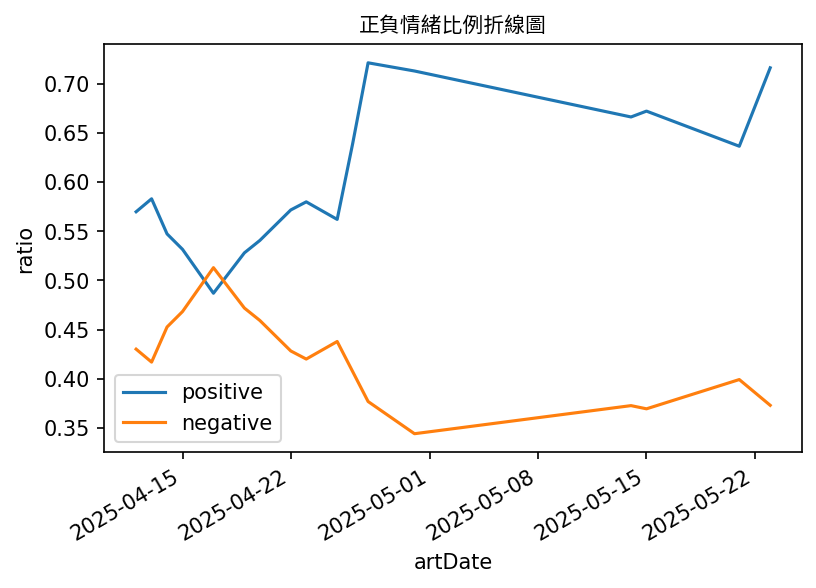

In [46]:
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]

fig, ax = plt.subplots()

rolling_days = 7
ax.plot(pos["artDate"], pos["ratio"].rolling(rolling_days).mean(), color=colors[0])
ax.plot(neg["artDate"], neg["ratio"].rolling(rolling_days).mean(), color=colors[1])

plt.xlabel("artDate")
plt.ylabel("ratio")
ax.legend(["positive", "negative"], loc="lower left")
fig.autofmt_xdate()
plt.title("正負情緒比例折線圖", fontproperties=fprop)

In [22]:
ptt_sentiment_value = (
    sentiment_count.pivot_table(
        index="artDate", columns="sentiments", values="size", fill_value=0
    )
    .reset_index()
    .rename_axis(None, axis=1)
)
ptt_sentiment_value.head()

,artDate,negative,positive
0,2025-01-03,2.0,3.0
1,2025-01-19,1.0,3.0
2,2025-03-14,3.0,4.0
3,2025-04-06,3.0,5.0
4,2025-04-07,11.0,5.0


In [23]:
# sentiment 計算方式: positive - negative
ptt_sentiment_value["sentiment_value"] = (
    ptt_sentiment_value["positive"]
    - ptt_sentiment_value["negative"]
)
ptt_sentiment_value.head()

,artDate,negative,positive,sentiment_value
0,2025-01-03,2.0,3.0,1.0
1,2025-01-19,1.0,3.0,2.0
2,2025-03-14,3.0,4.0,1.0
3,2025-04-06,3.0,5.0,2.0
4,2025-04-07,11.0,5.0,-6.0


Text(0.5, 1.0, '正負情緒分數趨勢折線圖')

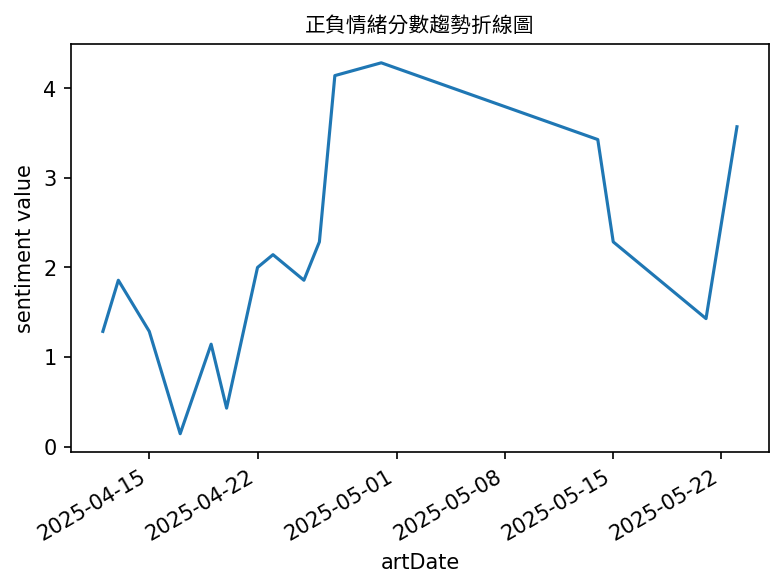

In [45]:
fig, ax = plt.subplots()

rolling_days = 7
ax.plot(ptt_sentiment_value["artDate"], ptt_sentiment_value["sentiment_value"].rolling(rolling_days).mean())
ax.set_xlabel("artDate")
ax.set_ylabel("sentiment value")
fig.autofmt_xdate()
plt.title("正負情緒分數趨勢折線圖", fontproperties=fprop)

以文章為單位

In [25]:
sentiment_count_by_article = pd.DataFrame(
    ptt_liwc_df.groupby(["artUrl", "sentiments"]).size()
).reset_index()
sentiment_count_by_article = sentiment_count_by_article.rename(columns={0: "size"})
sentiment_count_by_article.head(10)

,artUrl,sentiments,size
0,https://news.ebc.net.tw/news/world/483626,affect,18
1,https://news.ebc.net.tw/news/world/483626,anger,1
2,https://news.ebc.net.tw/news/world/483626,anx,5
3,https://news.ebc.net.tw/news/world/483626,negative,12
4,https://news.ebc.net.tw/news/world/483626,positive,5
5,https://news.ebc.net.tw/news/world/485389,affect,14
6,https://news.ebc.net.tw/news/world/485389,anger,1
7,https://news.ebc.net.tw/news/world/485389,anx,1
8,https://news.ebc.net.tw/news/world/485389,negative,3
9,https://news.ebc.net.tw/news/world/485389,positive,8


In [26]:
ptt_sentiment_value_by_article = (
    sentiment_count_by_article.pivot_table(
        index="artUrl", columns="sentiments", values="size", fill_value=0
    )
    .reset_index()
    .rename_axis(None, axis=1)
)
ptt_sentiment_value_by_article.head()

,artUrl,affect,anger,anx,negative,positive,sad
0,https://news.ebc.net.tw/news/world/483626,18.0,1.0,5.0,12.0,5.0,0.0
1,https://news.ebc.net.tw/news/world/485389,14.0,1.0,1.0,3.0,8.0,0.0
2,https://news.ebc.net.tw/news/world/486002,8.0,0.0,0.0,2.0,7.0,0.0
3,https://news.ebc.net.tw/news/world/487042,11.0,0.0,1.0,1.0,8.0,0.0
4,https://tw.nextapple.com/international/2025041...,1.0,1.0,0.0,1.0,0.0,0.0


In [27]:
# sentiment 計算方式: positive - negative
ptt_sentiment_value_by_article["sentiment_value"] = (
    ptt_sentiment_value_by_article["positive"]
    - ptt_sentiment_value_by_article["negative"]
)
ptt_sentiment_value_by_article.head()

,artUrl,affect,anger,anx,negative,positive,sad,sentiment_value
0,https://news.ebc.net.tw/news/world/483626,18.0,1.0,5.0,12.0,5.0,0.0,-7.0
1,https://news.ebc.net.tw/news/world/485389,14.0,1.0,1.0,3.0,8.0,0.0,5.0
2,https://news.ebc.net.tw/news/world/486002,8.0,0.0,0.0,2.0,7.0,0.0,5.0
3,https://news.ebc.net.tw/news/world/487042,11.0,0.0,1.0,1.0,8.0,0.0,7.0
4,https://tw.nextapple.com/international/2025041...,1.0,1.0,0.0,1.0,0.0,0.0,-1.0


In [28]:
ptt_sentiment_value_by_article['sentiment_class'] = ptt_sentiment_value_by_article['sentiment_value'].apply(lambda x: "正向" if x > 0 else "負向" )
ptt_sentiment_value_by_article.head(10)

,artUrl,affect,anger,anx,negative,positive,sad,sentiment_value,sentiment_class
0,https://news.ebc.net.tw/news/world/483626,18.0,1.0,5.0,12.0,5.0,0.0,-7.0,負向
1,https://news.ebc.net.tw/news/world/485389,14.0,1.0,1.0,3.0,8.0,0.0,5.0,正向
2,https://news.ebc.net.tw/news/world/486002,8.0,0.0,0.0,2.0,7.0,0.0,5.0,正向
3,https://news.ebc.net.tw/news/world/487042,11.0,0.0,1.0,1.0,8.0,0.0,7.0,正向
4,https://tw.nextapple.com/international/2025041...,1.0,1.0,0.0,1.0,0.0,0.0,-1.0,負向
5,https://udn.com/news/story/6809/8467059,5.0,1.0,0.0,2.0,3.0,0.0,1.0,正向
6,https://udn.com/news/story/6809/8500951,4.0,0.0,1.0,1.0,3.0,0.0,2.0,正向
7,https://udn.com/news/story/6809/8657806,4.0,2.0,2.0,3.0,1.0,0.0,-2.0,負向
8,https://udn.com/news/story/6809/8759738,16.0,1.0,1.0,1.0,14.0,0.0,13.0,正向
9,https://udn.com/news/story/6810/8665596,23.0,1.0,3.0,9.0,10.0,1.0,1.0,正向


In [29]:
clear_df_sentiment = pd.merge(df, ptt_sentiment_value_by_article[['artUrl', 'sentiment_class']], how="left")
clear_df_sentiment["artDate"] = pd.to_datetime(clear_df_sentiment["artDate"])
clear_df_sentiment['artDate'] = clear_df_sentiment['artDate'].dt.date

clear_df_sentiment.head()

,system_id,artTitle,artDate,artCatagory,artUrl,artContent,dataSource,sentiment_class
0,1,大阪萬博周邊秒殺！ 要價400萬公仔、7年級回憶電子雞在列,2025-04-14,國際,https://tw.nextapple.com/international/2025041...,【余平／綜合外電】日本大阪萬博會今天開幕，一早就出現排隊人潮，官方商店門口在早上9點開門後馬...,appleDaily,負向
1,2,大阪世博13日正式開幕 觀展準備一次看,2025-04-12,國際,https://news.ebc.net.tw/news/world/483626,2025年世界博覽會（大阪世博）今天舉行開幕儀式，明天開展。這是自2005年「愛．地球博」以...,EBC,負向
2,3,日美關稅談判內幕 川普要求多進口美車 互贈中製紀念品,2025-04-20,國際,https://news.ebc.net.tw/news/world/485389,美國總統川普關稅戰，日本是首波談判國家之一，日本談判代表回國後透露了會談細節，川普親自出馬毫...,EBC,正向
3,4,直擊大阪世博TW館！猛秀晶片實力 滷肉飯飄香,2025-04-22,國際,https://news.ebc.net.tw/news/world/486002,隨著日本大阪萬博會展開，台灣的TECHWORLD館也在22號盛大開幕了，斥資20億台幣，場館...,EBC,正向
4,5,黃金周變「省錢周」！ 日本物價高漲掀假期「宅家」潮,2025-04-27,國際,https://news.ebc.net.tw/news/world/487042,日本迎來一年一度的黃金周，從四月底到五月初，多個連假串聯，吸引大量民眾湧入機場、樂園等景點，...,EBC,正向


In [30]:
sentiment_art_count = pd.DataFrame(
    clear_df_sentiment.groupby(["artDate", "sentiment_class"]).size()
).reset_index()
sentiment_art_count = sentiment_art_count.rename(columns={0: "size"})
sentiment_art_count = sentiment_art_count.sort_values(["artDate"])
sentiment_art_count

,artDate,sentiment_class,size
0,2025-01-03,正向,1
1,2025-01-19,正向,1
2,2025-03-14,正向,1
3,2025-04-06,正向,1
4,2025-04-07,負向,2
5,2025-04-10,正向,2
6,2025-04-12,正向,1
7,2025-04-12,負向,3
8,2025-04-13,正向,1
9,2025-04-14,正向,1


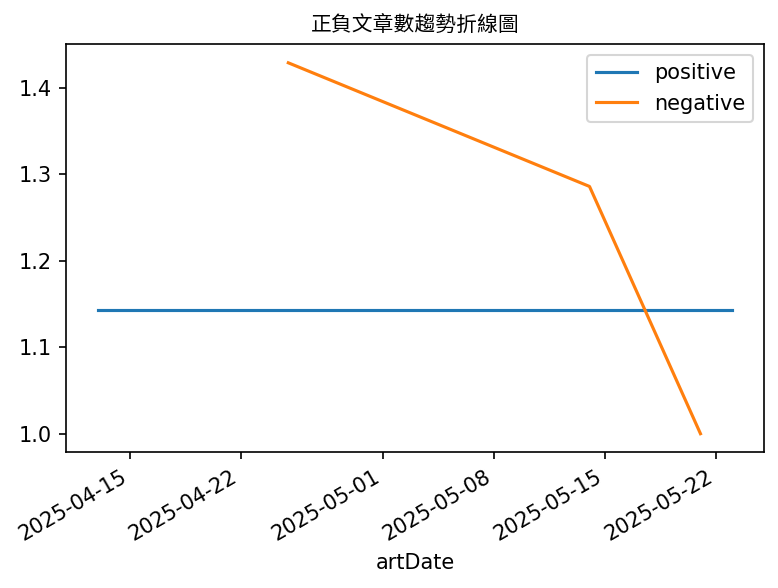

In [32]:
colors = ["tab:blue", "tab:orange"]
pos = sentiment_art_count[sentiment_art_count["sentiment_class"] == "正向"]
neg = sentiment_art_count[sentiment_art_count["sentiment_class"] == "負向"]

# fig, ax = plt.subplots(figsize = (6,4), dpi = 150) # 也可以在該圖設定參數
fig, ax = plt.subplots()

# 使用 Series.rolling().mean() 來產生 7 天平均
rolling_days = 7
ax.plot(pos["artDate"], pos['size'].rolling(rolling_days).mean(), color=colors[0])
ax.plot(neg["artDate"], neg["size"].rolling(rolling_days).mean(), color=colors[1])
# ax.plot(pos["artDate"], pos['size'], color=colors[0])
# ax.plot(neg["artDate"], neg["size"], color=colors[1])

plt.xlabel("artDate")
# plt.ylabel('size')
ax.legend(["positive", "negative"], loc="upper right")
fig.autofmt_xdate()
plt.title("正負文章數趨勢折線圖", fontproperties=fprop)  # 記得加上才能顯示中文
plt.show()

情緒代表字

In [33]:
word_count = ptt_liwc_df.groupby(["word", "sentiments"]).size().reset_index()
word_count = word_count.rename(columns={0: "size"})
word_count = word_count.sort_values(["size"], ascending=False)

word_count.head(10)

,word,sentiments,size
106,希望,positive,15
105,希望,affect,15
52,吸引,affect,15
53,吸引,positive,15
60,問題,negative,13
59,問題,affect,13
295,重要,affect,8
296,重要,positive,8
199,決定,positive,7
90,安全,affect,7


In [34]:
word_of_pos = word_count.loc[(word_count["sentiments"] == "positive")]
word_of_pos.head(15)

,word,sentiments,size
106,希望,positive,15
53,吸引,positive,15
296,重要,positive,8
199,決定,positive,7
91,安全,positive,7
135,成功,positive,6
192,樂園,positive,5
55,和平,positive,4
184,有趣,positive,4
327,魅力,positive,4


In [35]:
word_of_neg = word_count.loc[(word_count["sentiments"] == "negative")]
word_of_neg.head(15)

,word,sentiments,size
60,問題,negative,13
143,批評,negative,6
233,禁止,negative,6
82,失望,negative,5
162,擔心,negative,5
89,威脅,negative,4
74,壓力,negative,4
104,尷尬,negative,4
123,惡化,negative,3
121,惡劣,negative,3


C:\Users\User\AppData\Local\Temp\ipykernel_380\391454114.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(pos["word"], fontproperties=fprop)
C:\Users\User\AppData\Local\Temp\ipykernel_380\391454114.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels(neg["word"], fontproperties=fprop)


Text(0.5, 1.0, '負向情緒總數')

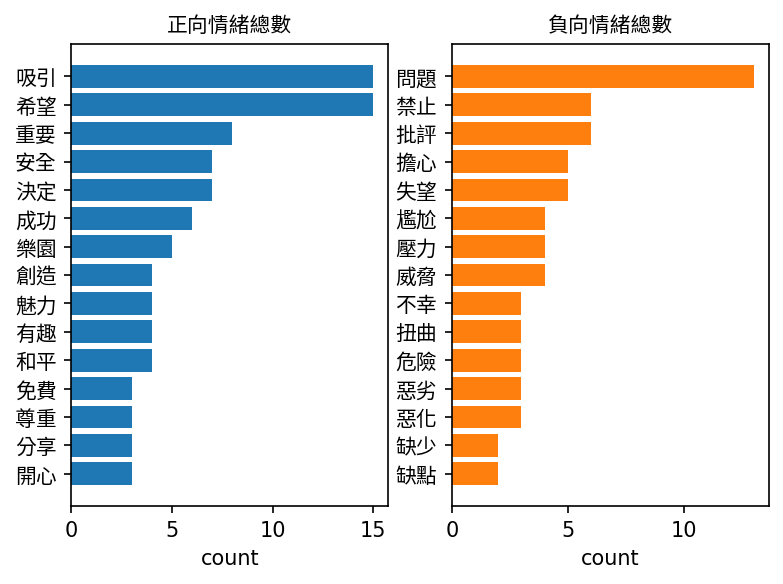

In [36]:
pos = word_of_pos.head(15).sort_values(["size"], ascending=True)
neg = word_of_neg.head(15).sort_values(["size"], ascending=True)

fig, ax = plt.subplots(1, 2)

ax[0].barh(pos["word"], pos["size"], color=colors[0])
ax[0].set_xlabel("count")
ax[0].set_yticklabels(pos["word"], fontproperties=fprop)
ax[0].set_title("正向情緒總數", fontproperties=fprop)

ax[1].barh(neg["word"], neg["size"], color=colors[1])
ax[1].set_xlabel("count")
ax[1].set_yticklabels(neg["word"], fontproperties=fprop)
ax[1].set_title("負向情緒總數", fontproperties=fprop)

In [43]:
filtered_df = sent_df[sent_df['sentence'].str.contains('失望', na=False)]
filtered_df.head()

,artTitle,artDate,artUrl,artContent,sentence
1584,一餐破千！大阪萬博「英式下午茶」遭日網炎上 台人見實品照傻眼了,2025-04-30,https://udn.com/news/story/6812/8709470,日本大阪申辦的2025年世界博覽會（簡稱世博、萬博）吸引全球民眾湧入參觀，但近日一位日本媽媽...,結果卻對館內的英式下午茶大感失望
1587,一餐破千！大阪萬博「英式下午茶」遭日網炎上 台人見實品照傻眼了,2025-04-30,https://udn.com/news/story/6812/8709470,日本大阪申辦的2025年世界博覽會（簡稱世博、萬博）吸引全球民眾湧入參觀，但近日一位日本媽媽...,真的會很失望
1623,一餐破千！大阪萬博「英式下午茶」遭日網炎上 台人見實品照傻眼了,2025-04-30,https://udn.com/news/story/6812/8709470,日本大阪申辦的2025年世界博覽會（簡稱世博、萬博）吸引全球民眾湧入參觀，但近日一位日本媽媽...,英式下午茶中的主角紅茶更讓人失望
1658,一餐破千！大阪萬博「英式下午茶」遭日網炎上 台人見實品照傻眼了,2025-04-30,https://udn.com/news/story/6812/8709470,日本大阪申辦的2025年世界博覽會（簡稱世博、萬博）吸引全球民眾湧入參觀，但近日一位日本媽媽...,令人失望
1664,一餐破千！大阪萬博「英式下午茶」遭日網炎上 台人見實品照傻眼了,2025-04-30,https://udn.com/news/story/6812/8709470,日本大阪申辦的2025年世界博覽會（簡稱世博、萬博）吸引全球民眾湧入參觀，但近日一位日本媽媽...,真的會很失望


In [44]:
for sentence in filtered_df['sentence'].to_list():
    print(sentence)
    print("=========================")

結果卻對館內的英式下午茶大感失望
真的會很失望
英式下午茶中的主角紅茶更讓人失望
令人失望
真的會很失望
